In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib
from french_preprocessing.french_preprocessing import FrenchPreprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
text = "text"
label = "label"

tqdm.pandas()

warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

df = pd.read_csv("./data/combined_dataset.csv")
df = df.dropna(subset=[text, label])

""" df_train = pd.read_csv("./data/augmented_train_dataset.csv")
df_train = df_train.dropna(subset=[text, label])

df_test = pd.read_csv("./data/test_dataset.csv")
df_test = df_test.dropna(subset=[text, label]) """

default_stopwords = [
    "y",
    "y'",
    "m",
    "l",
    "d",
    "t",
    "qu",
    "s",
    "c",
    "m'",
    "hein",
    "celle-là",
    "ceux-ci",
    "dring",
    "sa",
    "ollé",
    "en",
    "a",
    "d'",
    "plutôt",
    "auxquels",
    "celles-ci",
    "dès",
    "tel",
    "lui-meme",
    "quelle",
    "les",
    "dont",
    "aie",
    "quand",
    "pour",
    "où",
    "lès",
    "suivant",
    "ho",
    "memes",
    "hem",
    "surtout",
    "mien",
    "tellement",
    "qui",
    "le",
    "quels",
    "tant",
    "une",
    "tien",
    "ohé",
    "i",
    "mêmes",
    "ceux",
    "l'",
    "quelque",
    "si",
    "unes",
    "lequel",
    "tous",
    "chacune",
    "son",
    "que",
    "quel",
    "au",
    "ai",
    "celui-là",
    "chaque",
    "ouste",
    "es",
    "hep",
    "elles-mêmes",
    "lors",
    "cette",
    "cependant",
    "toc",
    "tsouin",
    "chacun",
    "seule",
    "siennes",
    "hum",
    "la",
    "certains",
    "t'",
    "trop",
    "dans",
    "desquels",
    "lui",
    "hors",
    "celles-là",
    "lui-même",
    "pouah",
    "toi-même",
    "boum",
    "vive",
    "rend",
    "mes",
    "vos",
    "nous",
    "qu'",
    "des",
    "tiens",
    "hé",
    "lorsque",
    "zut",
    "vlan",
    "mienne",
    "na",
    "ma",
    "selon",
    "s'",
    "vous-mêmes",
    "eh",
    "ah",
    "ses",
    "meme",
    "lesquels",
    "miens",
    "vôtres",
    "paf",
    "pif",
    "quant-à-soi",
    "tes",
    "c'",
    "sien",
    "ça",
    "lesquelles",
    "tout",
    "telles",
    "même",
    "ces",
    "maint",
    "notre",
    "quanta",
    "elle-même",
    "aupres",
    "bas",
    "votre",
    "plusieurs",
    "moi",
    "par",
    "hurrah",
    "bah",
    "laquelle",
    "auxquelles",
    "vé",
    "peux",
    "pure",
    "tiennes",
    "aujourd'hui",
    "hormis",
    "couic",
    "vous",
    "ore",
    "envers",
    "moindres",
    "aucune",
    "gens",
    "ouias",
    "cela",
    "quelles",
    "aux",
    "pff",
    "etc",
    "toutefois",
    "leurs",
    "ton",
    "clic",
    "las",
    "pfut",
    "t'",
    "toutes",
    "cet",
    "ta",
    "da",
    "toute",
    "aucun",
    "o",
    "sapristi",
    "quoi",
    "desquelles",
    "té",
    "vôtre",
    "euh",
    "pres",
    "as",
    "fi",
    "ci",
    "allo",
    "oh",
    "s'",
    "quiconque",
    "floc",
    "avec",
    "se",
    "bat",
    "tic",
    "jusqu",
    "qu'",
    "unique",
    "certes",
    "celles",
    "dire",
    "tienne",
    "ha",
    "nôtre",
    "jusque",
    "tac",
    "ceux-là",
    "sienne",
    "uns",
    "ouf",
    "moi-même",
    "et",
    "vers",
    "miennes",
    "autrefois",
    "houp",
    "été",
    "à",
    "d'",
    "nouveau",
    "être",
    "peu",
    "dite",
    "s'",
    "dit",
    "tels",
    "ou",
    "toi",
    "entre",
    "avoir",
    "hop",
    "delà",
    "nos",
    "tres",
    "telle",
    "voilà",
    "dessous",
    "soit",
    "autres",
    "psitt",
    "hélas",
    "anterieur",
    "hou",
    "près",
    "auquel",
    "juste",
    "chut",
    "un",
    "stop",
    "eux",
    "ès",
    "vifs",
    "ce",
    "quoique",
    "du",
    "moi-meme",
    "mon",
    "brrr",
    "sous",
    "parmi",
    "deja",
    "déja",
    "celle",
    "siens",
    "suffisant",
    "â",
    "l'",
    "apres",
    "sans",
    "soi-même",
    "là",
    "pur",
    "via",
    "differentes",
    "specifique",
    "holà",
    "tsoin",
    "pan",
    "car",
    "donc",
    "dits",
    "merci",
    "particulièrement",
    "nous-mêmes",
    "personne",
    "allô",
    "soi",
    "voici",
    "sur",
    "vif",
    "celle-ci",
    "malgré",
    "puis",
    "sauf",
    "autre",
    "hui",
    "ceci",
    "leur",
    "celui-ci",
    "necessairement",
    "sacrebleu",
    "hue",
    "eux-mêmes",
    "outre",
    "alors",
    "desormais",
    "plouf",
    "longtemps",
    "malgre",
    "après",
    "de",
    "oust",
    "neanmoins",
    "certain",
    "crac",
    "depuis",
    "olé",
    "hi",
    "te",
    "puisque",
    "m'",
    "me",
    "ô",
    "celui",
    "aussi",
    "rares",
    "chiche",
    "rien",
    "pfft",
    "c'",
    "vu",
    "clac",
    "duquel",
    "aavons",
    "avez",
    "ont",
    "eu",
    "avais",
    "avait",
    "avions",
    "aviez",
    "avaient",
    "eus",
    "eut",
    "eûmes",
    "eûtes",
    "eurent",
    "aurai",
    "auras",
    "aura",
    "aurons",
    "aurez",
    "auront",
    "aurais",
    "aurait",
    "aurions",
    "auriez",
    "auraient",
    "aies",
    "ait",
    "ayons",
    "ayez",
    "aient",
    "eusse",
    "eusses",
    "eût",
    "eussions",
    "eussiez",
    "eussent",
    "ayant",
    "suis",
    "est",
    "sommes",
    "êtes",
    "sont",
    "étais",
    "était",
    "étions",
    "étiez",
    "étaient",
    "fus",
    "fut",
    "fûmes",
    "fûtes",
    "furent",
    "serai",
    "seras",
    "sera",
    "serons",
    "serez",
    "seront",
    "serais",
    "serait",
    "serions",
    "seriez",
    "seraient",
    "sois",
    "soyons",
    "soyez",
    "soient",
    "fusse",
    "fusses",
    "fût",
    "fussions",
    "fussiez",
    "fussent",
    "étant",
]
default_symbols = """#§_-@+=*<>()[]{}/\\"'"""
default_punct = """!;:,.?-..."""

preprocessor = FrenchPreprocessing(
    stopwords=default_stopwords, symbols=default_symbols, punct=default_punct
)

X = df[text]
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

""" X_train = df_train[text]
y_train = df_train[label]
X_test = df_test[text]
y_test = df_test[label] """

X_train = X_train.to_frame()
X_test = X_test.to_frame()

Some weights of the model checkpoint at gilf/french-camembert-postag-model were not used when initializing CamembertForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
X_train["preprocessed_text"] = X_train[text].progress_apply(preprocessor.preprocessing)
X_test["preprocessed_text"] = X_test[text].progress_apply(preprocessor.preprocessing)

100%|██████████| 2680/2680 [00:00<00:00, 15749.41it/s]


In [4]:
pipelines = {
    "Logistic Regression": Pipeline(
        [("vectorizer", TfidfVectorizer()), ("classifier", LogisticRegression())]
    ),
    "Naive Bayes": Pipeline(
        [("vectorizer", TfidfVectorizer()), ("classifier", MultinomialNB())]
    ),
    "SVM": Pipeline(
        [("vectorizer", TfidfVectorizer()), ("classifier", SVC(probability=True))]
    ),
    "Random Forest": Pipeline(
        [("vectorizer", TfidfVectorizer()), ("classifier", RandomForestClassifier())]
    ),
}

parameters = {
    "Logistic Regression": {
        "vectorizer__max_features": [5000],
        "vectorizer__ngram_range": [(1, 2)],
        "classifier__C": [1],
        "classifier__penalty": ["l2"],
        "classifier__solver": ["lbfgs"]
    },
    "Naive Bayes": {
        "vectorizer__max_features": [10000],
        "vectorizer__ngram_range": [(1, 2)],
        "classifier__alpha": [1]
    },
    "SVM": {
        "vectorizer__max_features": [10000],
        "vectorizer__ngram_range": [(1, 1)],
        "classifier__C": [1],
        "classifier__kernel": ["rbf"],
        "classifier__gamma": ["scale"]
    },
    "Random Forest": {
        "vectorizer__max_features": [2000],
        "vectorizer__ngram_range": [(1, 1)],
        "classifier__n_estimators": [300],
        "classifier__max_depth": [None],
        "classifier__min_samples_split": [10],
        "classifier__min_samples_leaf": [1]
    }
}

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", cbar=True, annot_kws={"size": 14}
    )
    plt.title(f"Confusion Matrix - {title}", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    print("Confusion Matrix:\n", cm)


Optimisation du modèle : Logistic Regression
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Précision : 0.7683

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.78      0.80      0.79      1448
 non_hateful       0.75      0.74      0.74      1232

    accuracy                           0.77      2680
   macro avg       0.77      0.77      0.77      2680
weighted avg       0.77      0.77      0.77      2680



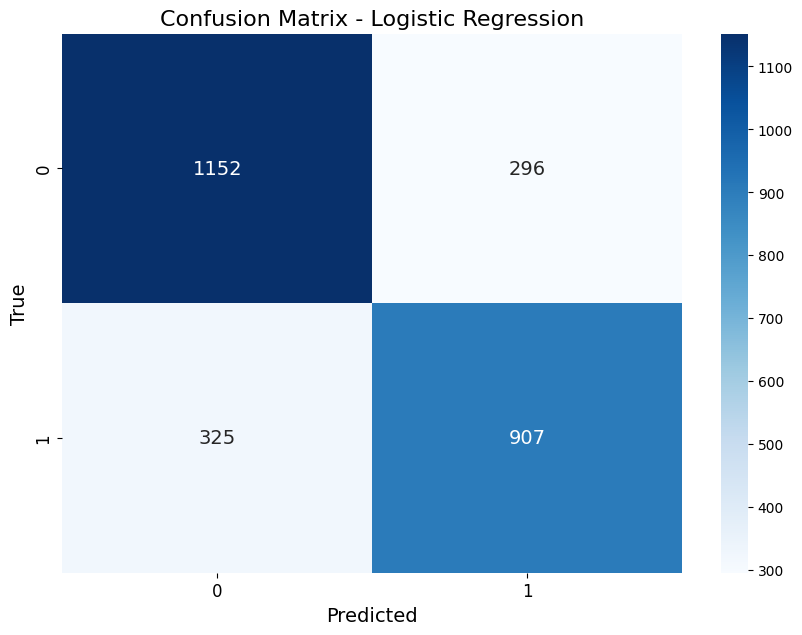

Confusion Matrix:
 [[1152  296]
 [ 325  907]]

Optimisation du modèle : Naive Bayes
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Précision : 0.7549

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.78      0.75      0.77      1448
 non_hateful       0.72      0.76      0.74      1232

    accuracy                           0.75      2680
   macro avg       0.75      0.75      0.75      2680
weighted avg       0.76      0.75      0.76      2680



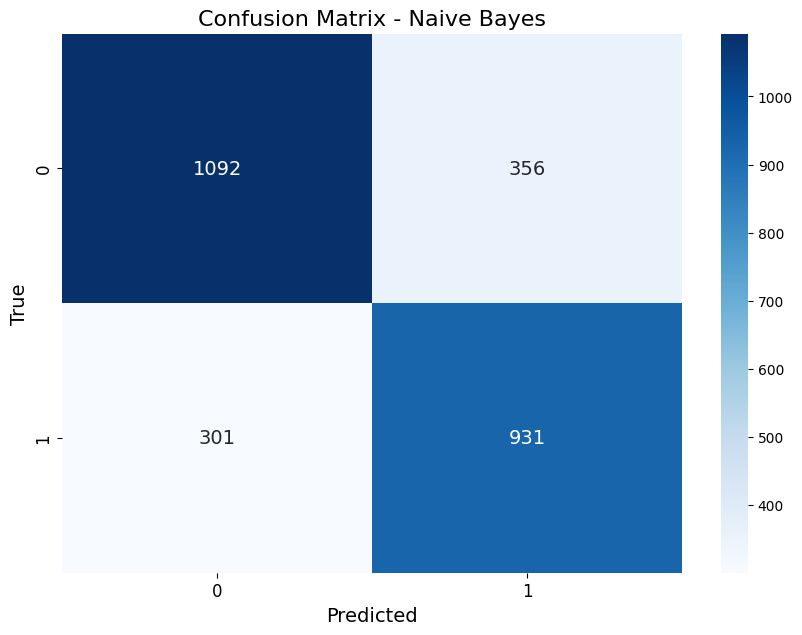

Confusion Matrix:
 [[1092  356]
 [ 301  931]]

Optimisation du modèle : SVM
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Précision : 0.7776

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.79      0.80      0.79      1448
 non_hateful       0.76      0.75      0.76      1232

    accuracy                           0.78      2680
   macro avg       0.78      0.78      0.78      2680
weighted avg       0.78      0.78      0.78      2680



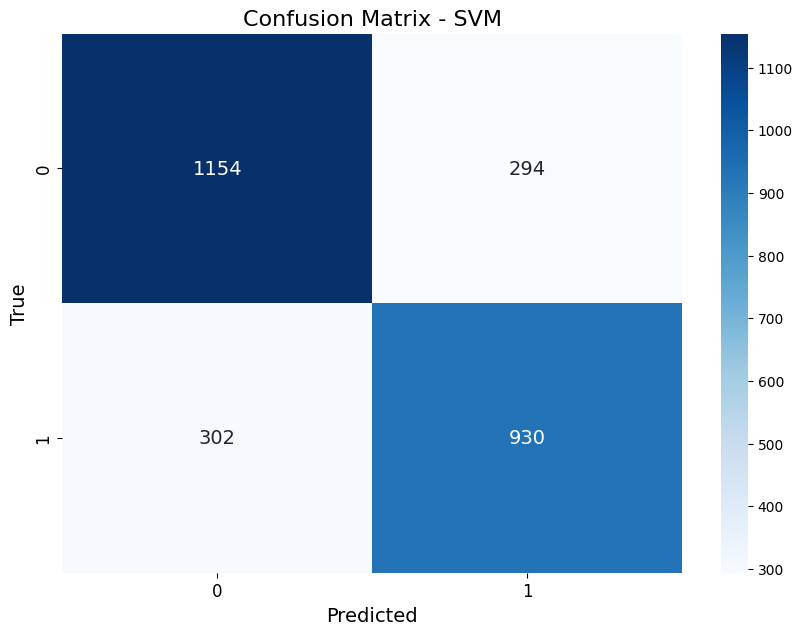

Confusion Matrix:
 [[1154  294]
 [ 302  930]]

Optimisation du modèle : Random Forest
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Précision : 0.7772

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.80      0.79      0.79      1448
 non_hateful       0.76      0.76      0.76      1232

    accuracy                           0.78      2680
   macro avg       0.78      0.78      0.78      2680
weighted avg       0.78      0.78      0.78      2680



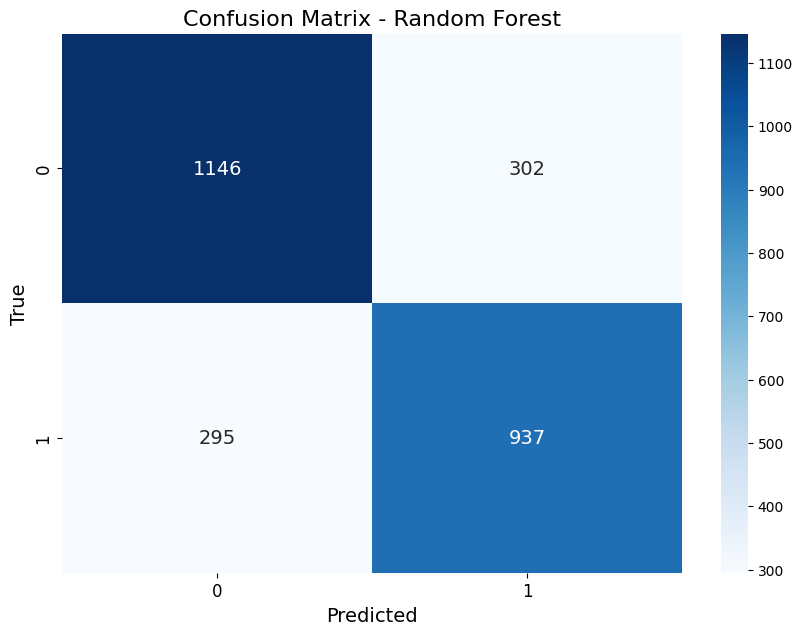

Confusion Matrix:
 [[1146  302]
 [ 295  937]]

Résultats de l'ensemble :
Précision : 0.7761

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.79      0.79      0.79      1448
 non_hateful       0.76      0.76      0.76      1232

    accuracy                           0.78      2680
   macro avg       0.77      0.77      0.77      2680
weighted avg       0.78      0.78      0.78      2680



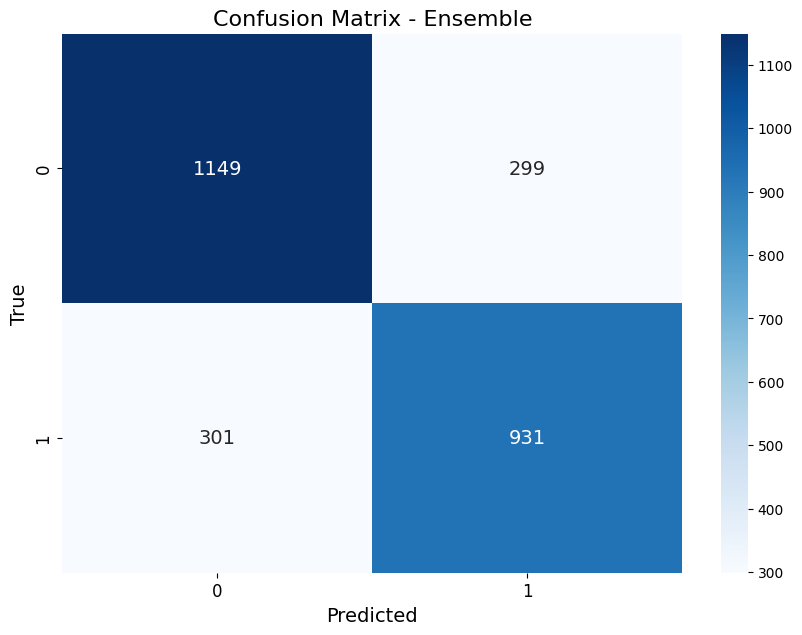

Confusion Matrix:
 [[1149  299]
 [ 301  931]]


['./models/ensemble_model.joblib']

In [5]:
best_models = {}
for name, pipeline in pipelines.items():
    print(f"\nOptimisation du modèle : {name}")
    grid_search = GridSearchCV(
        pipeline, parameters[name], cv=2, n_jobs=-1, verbose=1, pre_dispatch="2*n_jobs"
    )
    grid_search.fit(X_train["preprocessed_text"], y_train)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(X_test["preprocessed_text"])
    print(f"Précision : {accuracy_score(y_test, y_pred):.4f}")
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, name)

    joblib.dump(best_models[name], f"./models/{name}_optimized.joblib")

ensemble = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()], voting="soft"
)
ensemble.fit(X_train["preprocessed_text"], y_train)

y_pred_ensemble = ensemble.predict(X_test["preprocessed_text"])
print("\nRésultats de l'ensemble :")
print(f"Précision : {accuracy_score(y_test, y_pred_ensemble):.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_ensemble))

plot_confusion_matrix(y_test, y_pred_ensemble, "Ensemble")

joblib.dump(ensemble, "./models/ensemble_model.joblib")
